<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [136]:
sat_filepath = '../../DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'
with open(sat_filepath, 'r') as f:
    data = [row.strip().split(',') for row in f]

my_dict = {row[0]:row[1:] for row in zip(*data)}
my_dict

{'Math': ('510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'),
 'Rate': ('82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'),
 'State': ('CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [132]:
#The difference between the two files is the values in the Rate, Verbal and Math columns of the DataFrame are 'int64'
#type, whereas the values in the dictionary are strings
sat_data = pd.read_csv(sat_filepath)
pd.DataFrame.from_dict(my_dict.items(), orient ='columns')
sat_data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [108]:
sat_data.head(10)
#The data seems to be the average for each state's SAT scores, and the rating(out of 100) of that 
#state's score

,State,Rate,Verbal,Math,Verbal_Math_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

#SAT Data

-State: This variable contains the keys, which are the different states.
dtype: 'Object'

-Verbal: This variable contains the scores for the Verbal portion of the exam for each state.
dtype: 'Float'

-Rate: This variable contains the data that represents the rating that each state received based on their overall SAT scores.
dtype: 'Float'

-Math: This variable contains the data that represents the Math portion of the exam for each state.
dtype: 'Float'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

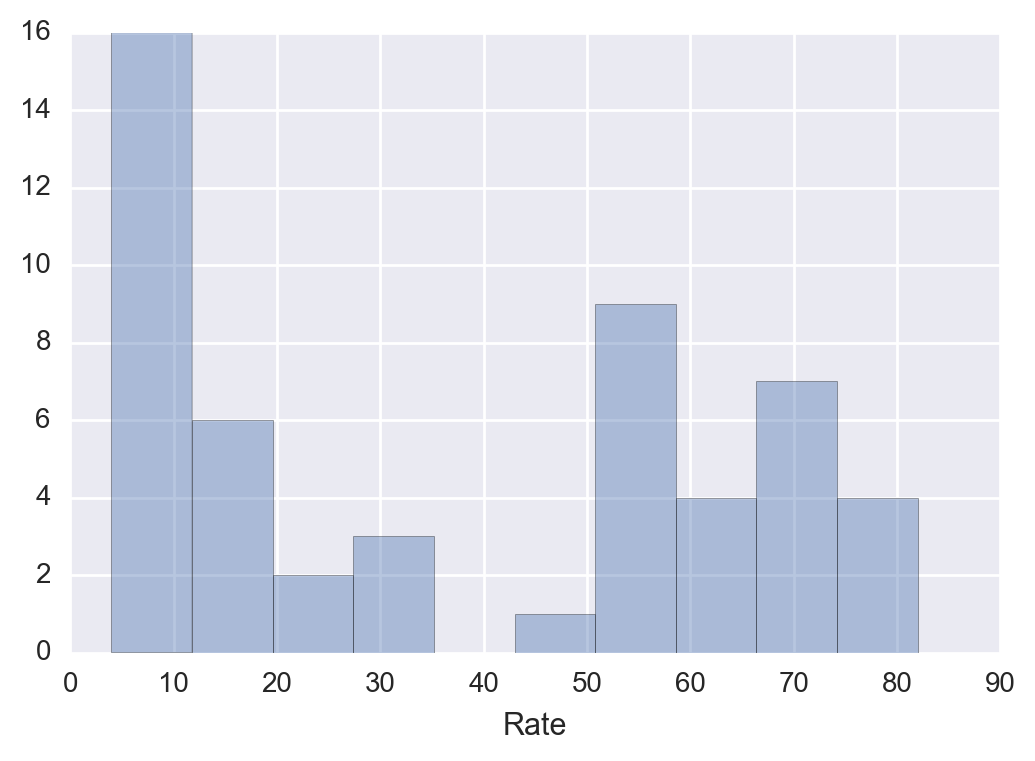

In [109]:
sns.distplot(sat_data.Rate, bins=10, kde=False)

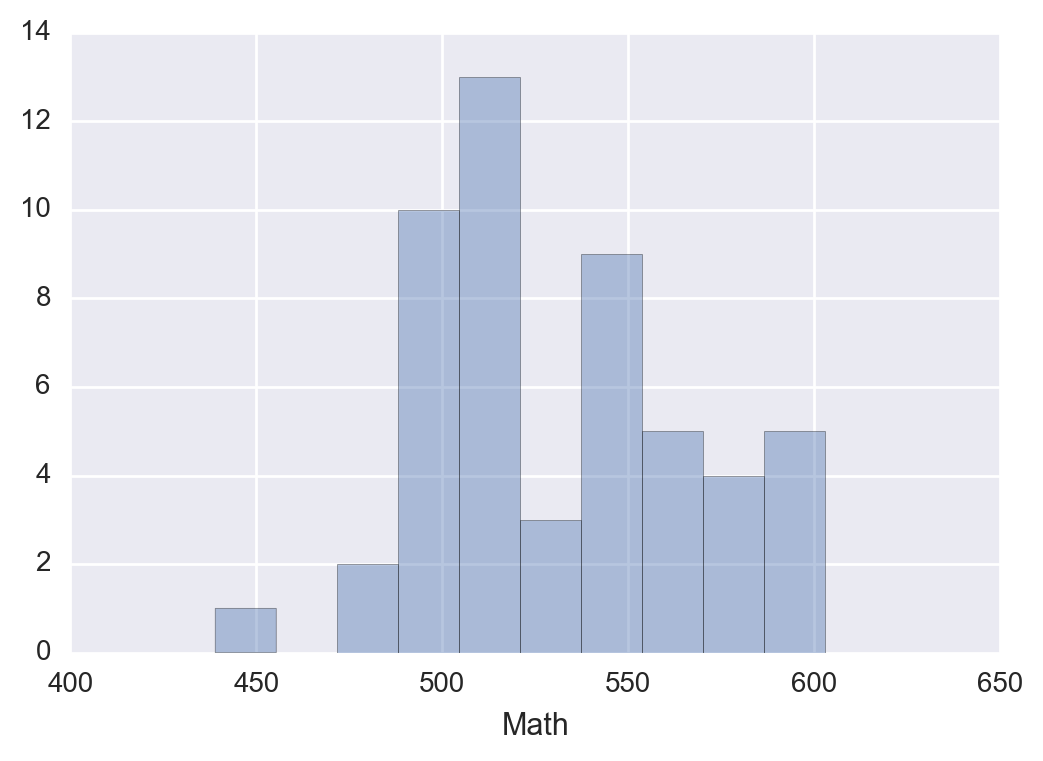

In [7]:
sns.distplot(sat_data.Math, bins=10, kde=False)

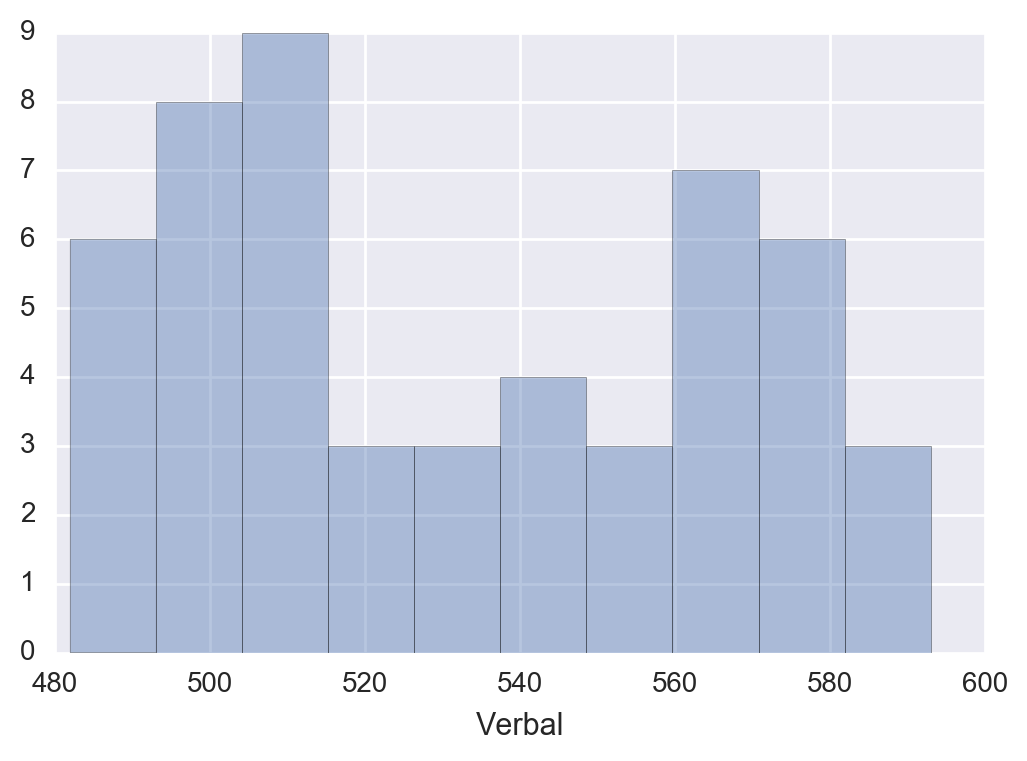

In [8]:
sns.distplot(sat_data.Verbal, bins=10, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

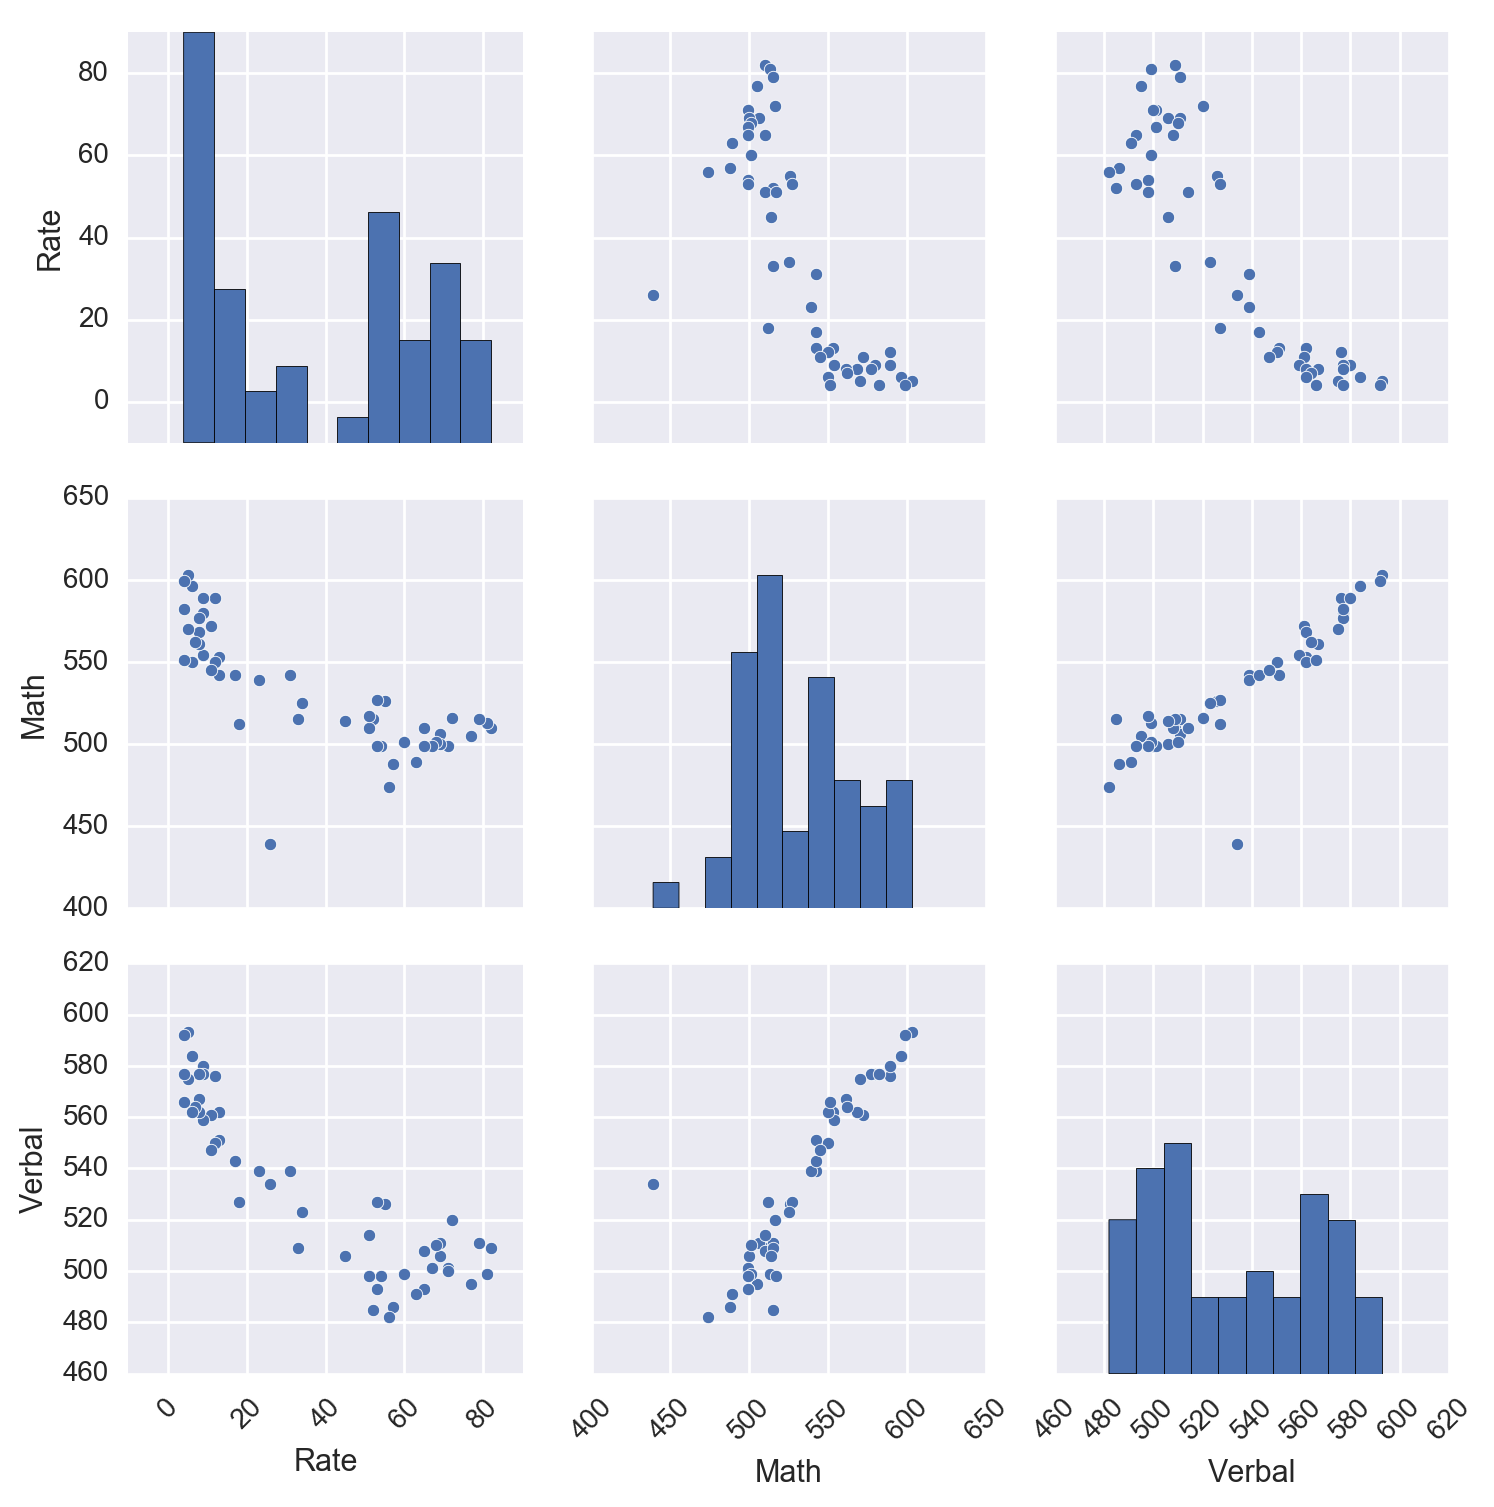

In [110]:
#From looking at these pairplots, we can see that there is correlation between the variables Math, Verbal and Rate
sat_data_pair = sns.pairplot(sat_data[["Rate", "Math", "Verbal"]], diag_kind="hist")

for ax in sat_data_pair.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

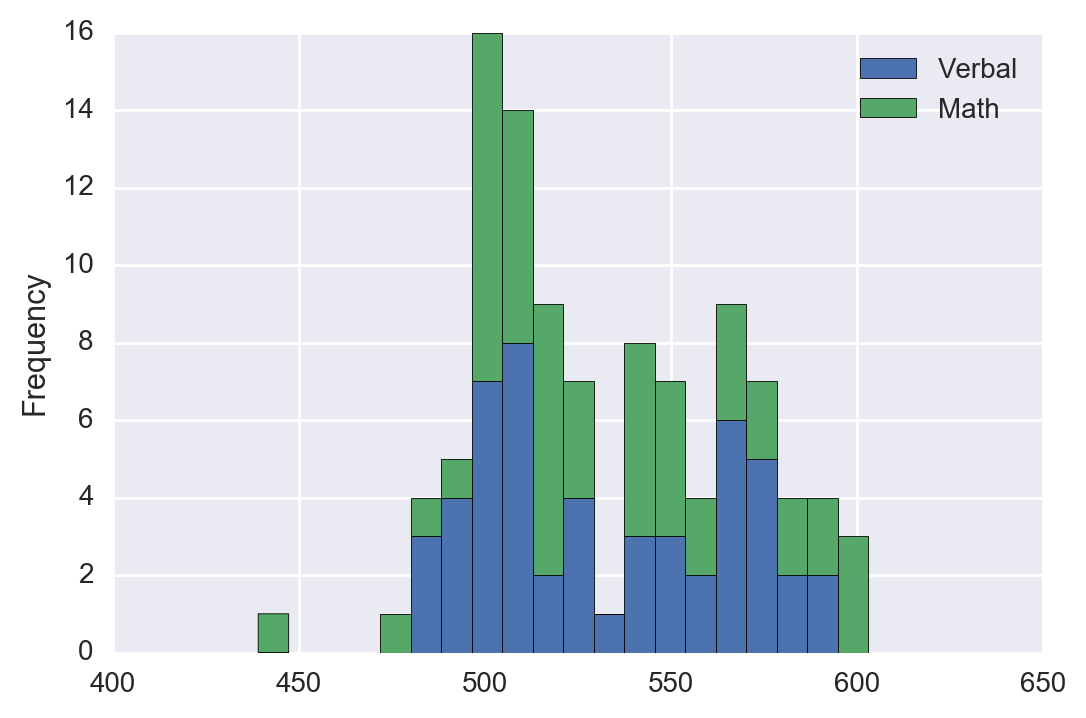

In [10]:
sat_data[["Verbal", "Math"]].plot.hist(bins= 20, stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x13811ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1239d3850>,
 'fliers': [<matplotlib.lines.Line2D at 0x1239e7b50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1239e7510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x13811ec90>,
  <matplotlib.lines.Line2D at 0x137e26e50>]}

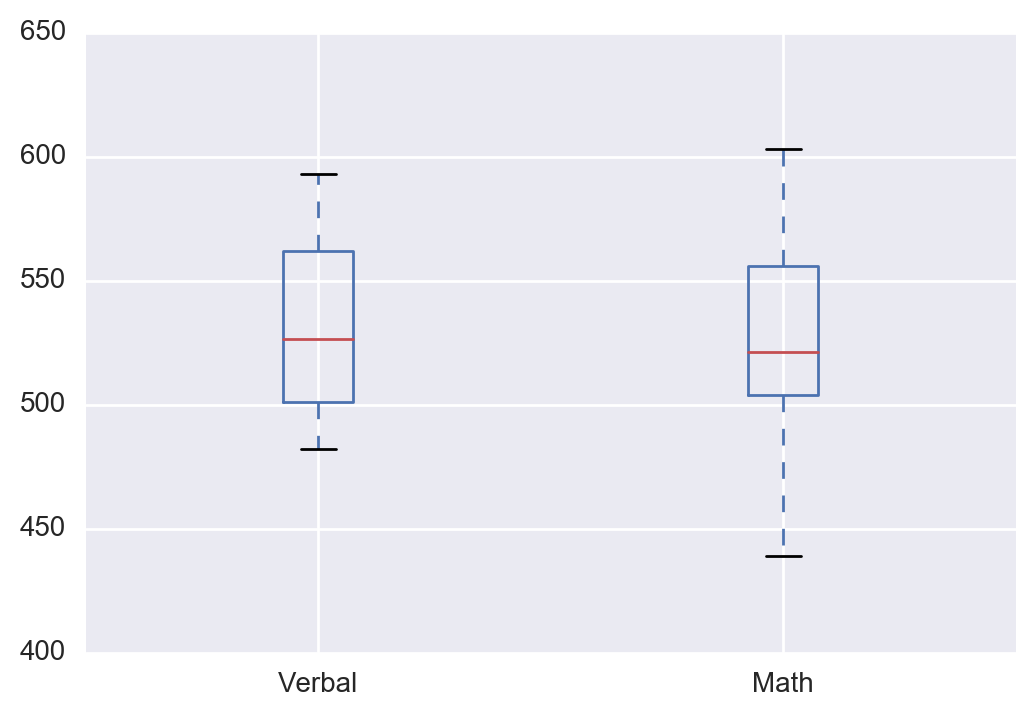

In [137]:
#If we were to plot the Rate data on the same chart as Math and Verbal, the data would be skewed since it is on a 
#100 point scale compared to the 800 point max for Verbal and Math
sat_data.boxplot(['Verbal', 'Math'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x11e7ec950>,
 'caps': [<matplotlib.lines.Line2D at 0x11e7fb850>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e806b50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e806510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11e7ecb50>,
  <matplotlib.lines.Line2D at 0x11e836a50>]}

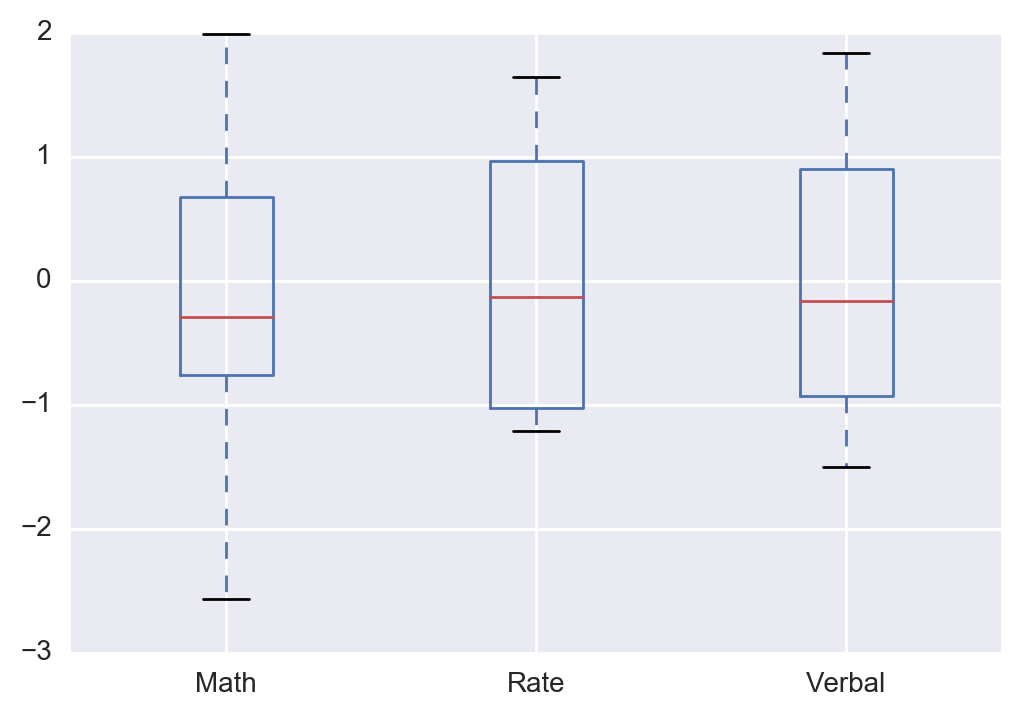

In [138]:
#In order to get the three different plots on the same chart, I chose to normalize the data using the formula we've
#learned. This way, the three data sets are all more accurately relative to eachother

Verbal_norm = (sat_data.Verbal - sat_data.Verbal.mean()) / sat_data.Verbal.std()
Math_norm = (sat_data.Math - sat_data.Math.mean()) / sat_data.Math.std()
Rate_norm = (sat_data.Rate - sat_data.Rate.mean()) / sat_data.Rate.std()

sat_data_norm = (sat_data - sat_data.mean()) / sat_data.std()
sat_data_norm.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [146]:
#There are 24 states with scores above the verbal mean. This tells me the distribution of Verbal scores is roughly normal
verbal_mean = sat_data.Verbal.mean()
verbal_mean_group = sat_data[sat_data['Verbal'] > verbal_mean]
verbal_mean_group.count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [148]:
#This list has additional states with Verbal scores greater than the median of Verbal scores. This tells me that the 
#median of Verbal scores is lower than the mean.
verbal_median = sat_data['Verbal'].median()
verbal_median_group = sat_data[sat_data['Verbal'] > verbal_median]
verbal_median_group

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [151]:
sat_data['Verbal_Math_Diff'] = sat_data['Verbal'] - sat_data['Math']
sat_data

,State,Rate,Verbal,Math,Verbal_Math_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [153]:
new_df_1 = pd.pivot_table(sat_data, values=['Verbal_Math_Diff'], columns=['State'])
Verbal_greater_Math = new_df_1.T.sort(columns= 'Verbal_Math_Diff', ascending=False, inplace=False)
Verbal_greater_Math.head(3)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Verbal_Math_Diff
State,
OH,95
MS,15
WV,15


In [154]:
Math_greater_Verbal = new_df_1.T.sort(columns= 'Verbal_Math_Diff', ascending=True, inplace=False)
Math_greater_Verbal.head(3)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Verbal_Math_Diff
State,
HI,-30
CA,-19
NJ,-14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [18]:
new_df_2 = sat_data.drop('State', 1)
new_df_2

,Rate,Verbal,Math,Verbal_Math_Diff
0,82,509,510,-1
1,81,499,513,-14
2,79,511,515,-4
3,77,495,505,-10
4,72,520,516,4
5,71,501,499,2
6,71,500,499,1
7,69,511,506,5
8,69,506,500,6
9,68,510,501,9


In [155]:
#This correlation matrix tells me that there is a pretty strong correlation between the different variables. Math and 
#verbal have a very strong positive correlation-almost .9, while verbal and Rate have a very strong negative correlation
#at almost -.9
new_df_2.corr(method='pearson')

,Rate,Verbal,Math,Verbal_Math_Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Math_Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [20]:
# count - count of the total values in the column
# mean - mean of all the values in the column
# std - standard deviation of the column
# min - the minimum or smallest value in the column
# 25% - 25% of the data in the column falls below this value
# 50% - 50% of the data in the column falls below this value
# 75% - 75% of the data in the column falls below this value
# max - maximum or largest value in the column
sat_data.describe()

,Rate,Verbal,Math,Verbal_Math_Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [21]:
sat_covariance = sat_data.cov()
print sat_covariance

                        Rate       Verbal         Math  Verbal_Math_Diff
Rate              745.387632  -804.355958  -760.803922        -43.552036
Verbal           -804.355958  1104.646682  1077.147059         27.499623
Math             -760.803922  1077.147059  1297.078431       -219.931373
Verbal_Math_Diff  -43.552036    27.499623  -219.931373        247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [22]:
iowa_file = '../../DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [156]:
iowa.get_dtype_counts()

datetime64[ns]    1
float64           7
int64             5
object            5
dtype: int64

In [24]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [25]:
iowa['County Number'].count()

269878

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [26]:
iowa['County Number'].count()

269878

In [27]:

iowa['State Bottle Cost'] = iowa['State Bottle Cost'].str.replace('$', '')
iowa['State Bottle Retail']= iowa['State Bottle Retail'].str.replace('$', '')
iowa['Sale (Dollars)']= iowa['Sale (Dollars)'].str.replace('$', '')
iowa['City'] = iowa['City'].str.lower()
iowa['County'] = iowa['County'].str.lower()
iowa['Category Name'] = iowa['Category Name'].str.lower()
iowa['Item Description'] = iowa['Item Description'].str.lower()
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].convert_objects(convert_numeric=True)
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].convert_objects(convert_numeric=True)
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].convert_objects(convert_numeric=True)
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [28]:
#Once I've cleaned the data and converted the columns to be the correct data types for filtering

iowa_nona = iowa.dropna()
iowa_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: float64(7), int

In [29]:
iowa_nona.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,sumner,50674,9.0,bremer,1051100.0,apricot brandies,55,54436,mr. boston apricot brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,davenport,52807,82.0,scott,1011100.0,blended whiskies,395,27605,tin cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,cedar falls,50613,7.0,black hawk,1011200.0,straight bourbon whiskies,65,19067,jim beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,ames,50010,85.0,story,1071100.0,american cocktails,395,59154,1800 ultimate margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,belmond,50421,99.0,wright,1031080.0,vodka 80 proof,297,35918,five o'clock vodka,1750,7.20,10.80,12,129.60,21.0,5.55


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [157]:
#I filtered out all the data in the table that wasn't in the year 2015. I figured that this was my best option if I 
# wanted to get all the data on an equal playing field before performing any more analysis. I would have liked to 
#further filter the DF to only include locations that had sales throughout the entire 2015, but I was unable to do this.

from datetime import datetime
iowa_nona['Date'] =pd.to_datetime(iowa_nona['Date'])
iowa_nona.sort_values(by='Date')

iowa_nona = iowa_nona.sort_values(by='Date')

iowa_nona_mask = (iowa_nona['Date'] >= '01/01/2015') & (iowa_nona['Date'] <= '12/31/2015')
iowa_2015 = iowa_nona[iowa_nona_mask]
iowa_nona.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
64461,2015-01-05,4312,council bluffs,51501,78.0,pottawattamie,1012200.0,scotch whiskies,240,6997,clan macgregor scotch,1000,6.66,9.99,12,119.88,12.0,3.17
259454,2015-01-05,2535,west des moines,50265,77.0,polk,1022100.0,tequila,35,89121,cazadores reposado,750,17.50,26.25,2,52.50,1.5,0.40
259083,2015-01-05,3400,des moines,50317,77.0,polk,1081600.0,whiskey liqueur,421,64867,fireball cinnamon whiskey,1000,11.34,17.01,12,204.12,12.0,3.17
168744,2015-01-05,4283,marion,52302,57.0,linn,1031080.0,vodka 80 proof,55,35317,barton vodka,1000,3.97,5.96,12,71.52,12.0,3.17
58300,2015-01-05,2959,des moines,50310,77.0,polk,1011300.0,tennessee whiskies,85,26826,jack daniels old #7 black lbl,750,14.53,21.80,12,261.60,9.0,2.38


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [160]:
iowa_2015_sales = iowa_2015.groupby(['Store Number'])['Sale (Dollars)'].sum().sort_values(ascending=False)
iowa_2015_sales.head()

Store Number
2633    997924.42
4829    874664.18
3385    439584.35
2512    419534.61
3420    348837.36
Name: Sale (Dollars), dtype: float64

### 10.2 Calculate the profit each store is making in 2015.


In [161]:
#I am creating a 'Cost' column in order to perform a calculation of the profit 
iowa_2015['Cost'] = iowa_2015['State Bottle Cost'] * iowa_2015['Bottles Sold']
#I then subtracted the newly created 'Cost' column from the 'Sale (Dollars)' column to get the total profit
iowa_2015['Profit'] = iowa_2015['Sale (Dollars)'] - iowa_2015['Cost']
#I then grouped the data by store and sorted the result by descending order to find the top performing stores
iowa_2015_profit = iowa_2015.groupby(['Store Number'])['Profit'].sum().sort_values(ascending=False)
iowa_2015_profit.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Store Number
2633    332863.87
4829    291813.75
3385    147084.62
2512    140072.72
3420    116532.24
Name: Profit, dtype: float64

In [162]:
iowa_2015.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost,Profit
64461,2015-01-05,4312,council bluffs,51501,78.0,pottawattamie,1012200.0,scotch whiskies,240,6997,clan macgregor scotch,1000,6.66,9.99,12,119.88,12.0,3.17,79.92,39.96
259454,2015-01-05,2535,west des moines,50265,77.0,polk,1022100.0,tequila,35,89121,cazadores reposado,750,17.50,26.25,2,52.50,1.5,0.40,35.00,17.50
259083,2015-01-05,3400,des moines,50317,77.0,polk,1081600.0,whiskey liqueur,421,64867,fireball cinnamon whiskey,1000,11.34,17.01,12,204.12,12.0,3.17,136.08,68.04
168744,2015-01-05,4283,marion,52302,57.0,linn,1031080.0,vodka 80 proof,55,35317,barton vodka,1000,3.97,5.96,12,71.52,12.0,3.17,47.64,23.88
58300,2015-01-05,2959,des moines,50310,77.0,polk,1011300.0,tennessee whiskies,85,26826,jack daniels old #7 black lbl,750,14.53,21.80,12,261.60,9.0,2.38,174.36,87.24


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [163]:
iowa_2015['Profit_per_gal'] = (iowa_2015['Profit'] / iowa_2015['Volume Sold (Gallons)']) 
iowa_profit_per_gal = iowa_2015.groupby(['County'])['Profit_per_gal'].sum().sort_values(ascending=False)
iowa_profit_per_gal.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


County
polk          978156.894020
linn          449712.310515
scott         323108.197571
black hawk    284792.212997
johnson       260699.874574
Name: Profit_per_gal, dtype: float64

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [165]:
#I created a for loop to iterate over the 'Category Name' column of the data and created 
#7 broad category types to add the data to.

def item_cat(x):
    if 'whisk' in x.lower():
        return 'whiskey'
    elif 'vodka' in x.lower():
        return 'vodka'
    elif 'rum' in x.lower():
        return 'rum'
    elif 'schnapps' in x.lower():
        return 'schnapps'
    elif 'gin' in x.lower():
        return 'gin'
    elif 'brand' in x.lower():
        return 'brandy'
    else:
        return 'other'

iowa_2015['Alcohol_category'] = iowa_2015['Category Name'].map(item_cat)

iowa_2015.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost,Profit,Profit_per_gal,Profit_margin,Alcohol_category
64461,2015-01-05,4312,council bluffs,51501,78.0,pottawattamie,1012200.0,scotch whiskies,240,6997,...,9.99,12,119.88,12.0,3.17,79.92,39.96,12.605678,33.333333,whiskey
259454,2015-01-05,2535,west des moines,50265,77.0,polk,1022100.0,tequila,35,89121,...,26.25,2,52.50,1.5,0.40,35.00,17.50,43.750000,33.333333,other
259083,2015-01-05,3400,des moines,50317,77.0,polk,1081600.0,whiskey liqueur,421,64867,...,17.01,12,204.12,12.0,3.17,136.08,68.04,21.463722,33.333333,whiskey
168744,2015-01-05,4283,marion,52302,57.0,linn,1031080.0,vodka 80 proof,55,35317,...,5.96,12,71.52,12.0,3.17,47.64,23.88,7.533123,33.389262,vodka
58300,2015-01-05,2959,des moines,50310,77.0,polk,1011300.0,tennessee whiskies,85,26826,...,21.80,12,261.60,9.0,2.38,174.36,87.24,36.655462,33.348624,whiskey


### 10.5 Do relationships exist between the broader liquor type and profit?

In [166]:
#It seems as though whiskey has the highest overall profit among all the liquor groups, based on my categorization. I 
#would say that there is a relationship between liquor type and profit.

iowa_2015.groupby(['Alcohol_category'])['Profit'].sum().sort_values(ascending=False)

Alcohol_category
whiskey     3363084.97
vodka       2278115.80
other       1633986.12
rum         1260611.47
brandy       397348.82
schnapps     334650.56
gin          256145.87
Name: Profit, dtype: float64

In [167]:
#The profit margin among the different liquor groups is not overwhelmingly different, but it does show that the amount
#of profit earned varies between each liquor type.
iowa_2015['Profit_margin'] = (iowa_2015['Profit'] / iowa_2015['Sale (Dollars)']) * 100
iowa_2015.groupby(['Alcohol_category'])['Profit_margin'].mean().sort_values(ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Alcohol_category
other       33.458306
vodka       33.448369
whiskey     33.435596
gin         33.425155
rum         33.398227
brandy      33.388572
schnapps    33.348414
Name: Profit_margin, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [130]:
Category_group = iowa_2015.groupby(['Alcohol_category'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False)
Category_group

Alcohol_category
whiskey     165600.81
vodka       158863.57
other        76299.97
rum          71698.84
schnapps     20432.38
brandy       16144.29
gin          15155.40
Name: Volume Sold (Gallons), dtype: float64

In [131]:
#I propose that a tax be placed on the top selling alcohol for each top county in terms of alcohol sales volume (in gallons).
#I have included the top 20 categories in terms of sale volume grouped by county below.
County_group = iowa_2015.groupby(['County','Alcohol_category'])['Volume Sold (Gallons)'].sum().sort_values(ascending=False)
County_group.head(20)

County         Alcohol_category
polk           vodka               35882.47
               whiskey             29970.94
               other               19180.55
linn           vodka               16048.03
polk           rum                 14038.03
linn           whiskey             12819.01
scott          vodka               11485.81
               whiskey              9743.98
johnson        vodka                9371.65
black hawk     vodka                8925.53
linn           other                7862.03
johnson        whiskey              7472.12
black hawk     whiskey              7148.07
linn           rum                  6223.97
woodbury       whiskey              5807.99
pottawattamie  whiskey              5772.40
dubuque        vodka                5468.68
scott          other                5355.26
story          whiskey              5213.13
dubuque        whiskey              5171.68
Name: Volume Sold (Gallons), dtype: float64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
